## 📦 Import Libraries
Import necessary Python libraries for data analysis and visualization.

In [10]:
# Import necessary libraries for data handling and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib import animation
import calendar
import matplotlib.colors as mcolors

## 📂 Load and Clean Data
Load the global temperature anomaly dataset and clean it for analysis.

In [11]:
# Load global temperature anomaly data from NASA GISTEMP
url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
df = pd.read_csv(url, skiprows=1)

# Rename 'Year' to 'Date' for melting
df = df.rename(columns={'Year': 'Date'})

# Melt monthly columns into long format
df = df.melt(id_vars='Date', var_name='Month', value_name='Temperature Anomaly')

# Keep only valid month names
valid_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df = df[df['Month'].isin(valid_months)]

# Drop rows with missing values
df.dropna(subset=['Temperature Anomaly'], inplace=True)

# Convert 'Temperature Anomaly' to numeric, coercing non-numeric (e.g., '***') to NaN
df['Temperature Anomaly'] = pd.to_numeric(df['Temperature Anomaly'], errors='coerce')
df.dropna(subset=['Temperature Anomaly'], inplace=True)

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'].astype(str) + '-' + df['Month'], format='%Y-%b')

# Final cleanup
df = df[['Date', 'Temperature Anomaly']].sort_values('Date')

# Add year and rolling 12-month mean
df['Year'] = df['Date'].dt.year
df['Rolling Mean'] = df['Temperature Anomaly'].rolling(window=12, min_periods=1).mean()

# Preview
print(df.head())

          Date  Temperature Anomaly  Year  Rolling Mean
0   1880-01-01                -0.18  1880       -0.1800
146 1880-02-01                -0.24  1880       -0.2100
292 1880-03-01                -0.09  1880       -0.1700
438 1880-04-01                -0.16  1880       -0.1675
584 1880-05-01                -0.10  1880       -0.1540


## 📽️ The Signal: Anomalies in Motion
Create an animated plot showing how temperature anomalies have evolved over time.

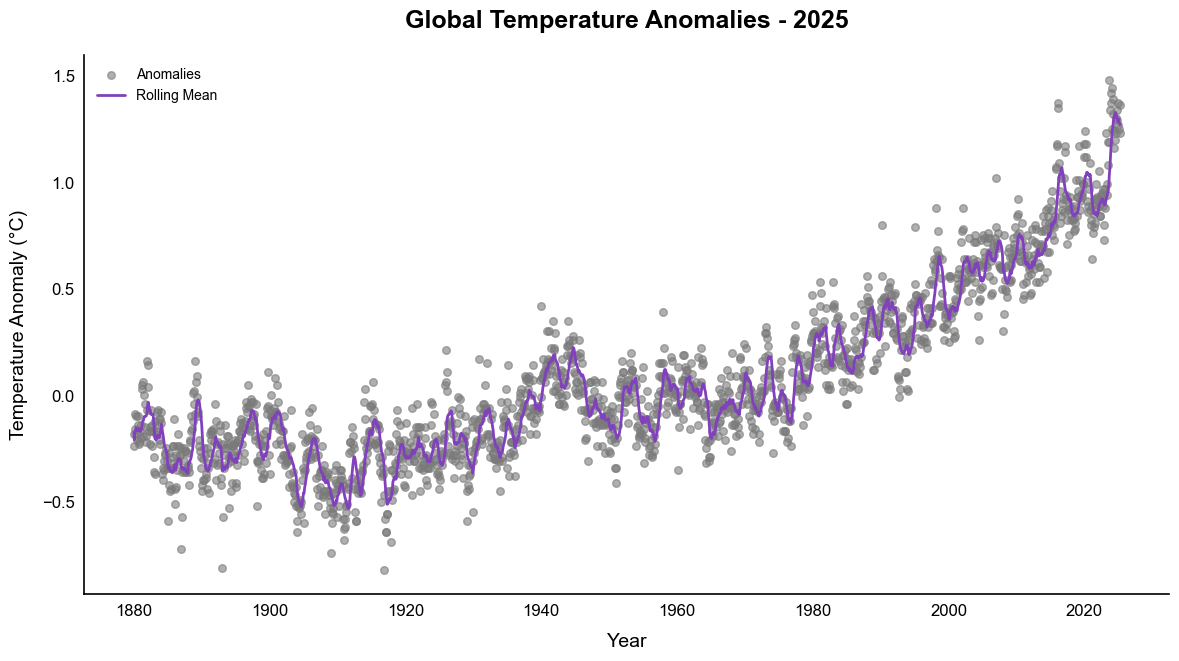

In [ ]:
# Create animation
fig, ax = plt.subplots(figsize=(14, 7))
sns.set_style("white")  # Removes gridlines

def update(frame):
    ax.clear()
    #ax.set_facecolor('#f5f5f5')
    data = df[df['Year'] <= df['Year'].unique()[frame]]

    # Plot dots and line
    ax.scatter(
        data['Date'], data['Temperature Anomaly'],
        color='#7a7a7a', alpha=0.6, s=30, label='Anomalies'
    )
    ax.plot(
        data['Date'], data['Rolling Mean'],
        color='#8141bd', linewidth=2, label='Rolling Mean'
    )

    # Title and axis styling
    ax.set_title(f"Global Temperature Anomalies - {data['Year'].max()}",
                 fontsize=18, fontweight='bold', color='black', pad=20)
    ax.set_xlabel("Year", fontsize=14, color='black', labelpad=10)
    ax.set_ylabel("Temperature Anomaly (°C)", fontsize=14, color='black', labelpad=10)
    ax.tick_params(axis='x', labelsize=12, colors='black')
    ax.tick_params(axis='y', labelsize=12, colors='black')

    # Clean chart borders
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)

    # Optional legend
    ax.legend(
        loc="upper left",
        frameon=False,
        fontsize=10,
        labelcolor='black',
        facecolor='#f5f5f5'
    )

# Generate animation
ani = animation.FuncAnimation(fig, update, frames=len(df['Year'].unique()), repeat=False)

# Save output
output_dir = "outputs/visualizations"
os.makedirs(output_dir, exist_ok=True)
ani.save(os.path.join(output_dir, "temperature_anomalies.gif"), writer="pillow", fps=5)
plt.show()

## 📊 The Season Shifts: Monthly Warming Patterns
Visualize average temperature anomalies by month across years to detect seasonal warming trends.

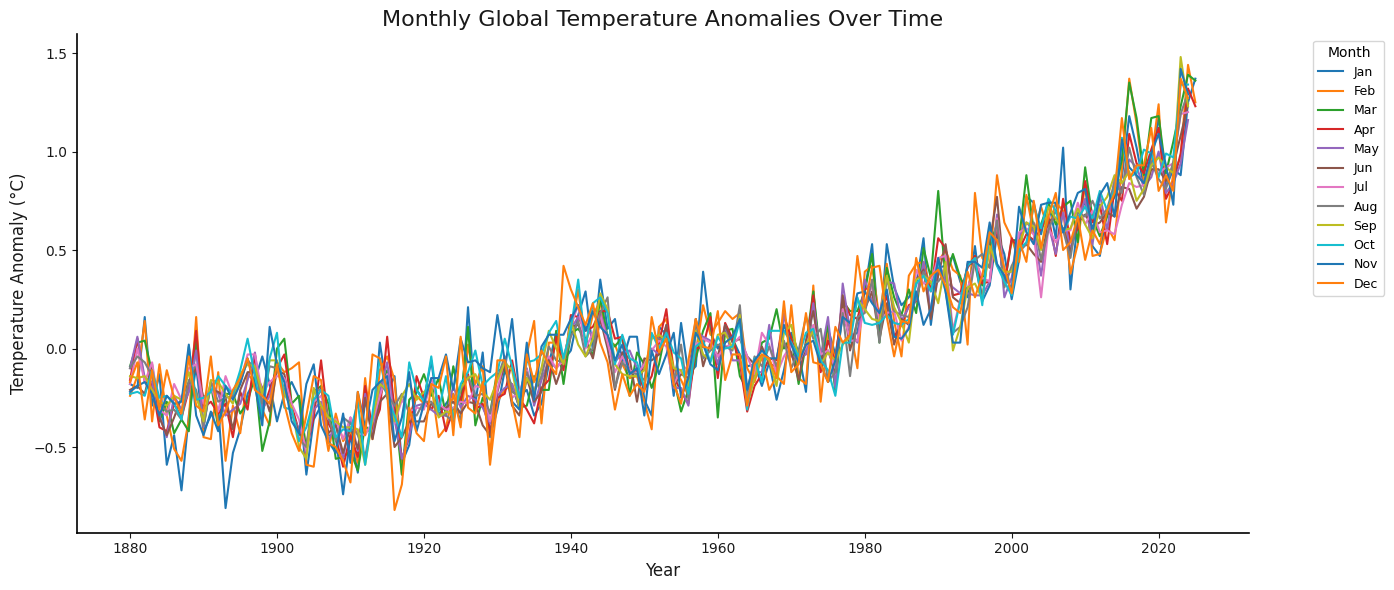

In [24]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Average temperature anomaly by year & month
monthly_avg = df.groupby(['Year', 'Month'])['Temperature Anomaly'].mean().reset_index()
monthly_pivot = monthly_avg.pivot(index='Year', columns='Month', values='Temperature Anomaly')

sns.set_style("white")  # Minimal, no grid
plt.style.use("default")

fig, ax = plt.subplots(figsize=(14, 6))
#fig.patch.set_facecolor('#f5f5f5')     # Figure background
#ax.set_facecolor('#f5f5f5')           # Axes background

# Plot each month's trend line
for month in monthly_pivot.columns:
    ax.plot(monthly_pivot.index, monthly_pivot[month], label=calendar.month_abbr[month])

# Clean layout
ax.grid(False)

# Show only left and bottom spines, make them black
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Axis and label styling
ax.set_title("Monthly Global Temperature Anomalies Over Time", fontsize=16, color='#1a1a1a')
ax.set_xlabel("Year", fontsize=12, color='#1a1a1a')
ax.set_ylabel("Temperature Anomaly (°C)", fontsize=12, color='#1a1a1a')
ax.tick_params(axis='x', colors='#1a1a1a')
ax.tick_params(axis='y', colors='#1a1a1a')

# Legend styling
ax.legend(
    title='Month',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=9,
    title_fontsize=10
)

# Save output
output_dir = "outputs/visualizations"
os.makedirs(output_dir, exist_ok=True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "monthly_warming_patterns_light.png"), dpi=200)
plt.show()

## 🧵 The Stripe of Time: Warming as Memory
Generate a stripe plot where each stripe color represents the average global temperature anomaly of that year.

C:\Users\ASofi\AppData\Local\Temp\ipykernel_3428\958194569.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=record_counts, x='Decade', y='Record Months', palette='rocket', ax=ax)


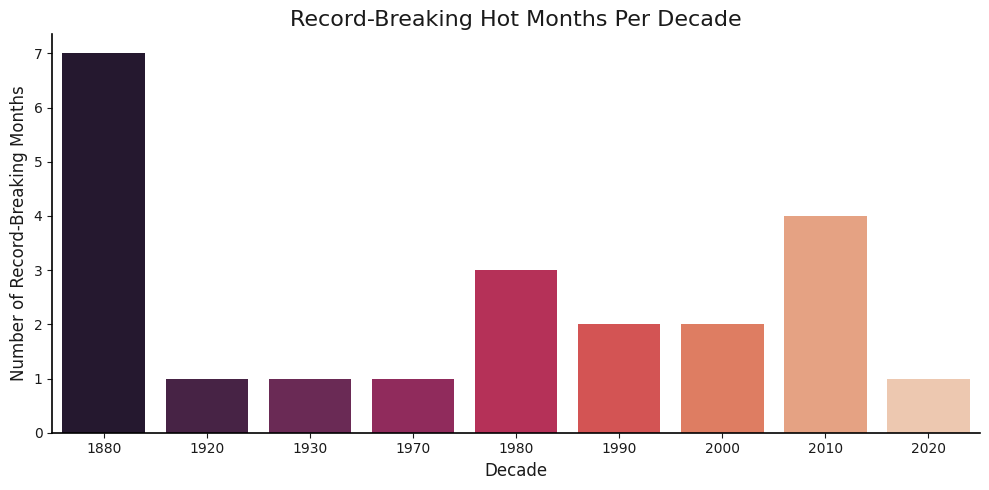

In [23]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Cumulative Max'] = df['Temperature Anomaly'].cummax()
df['RecordBreaker'] = df['Temperature Anomaly'] == df['Cumulative Max']
df['Decade'] = (df['Year'] // 10) * 10
record_counts = df[df['RecordBreaker']].groupby('Decade').size().reset_index(name='Record Months')

sns.set_style("white")  # Minimal, clean
plt.style.use('default')  # Light theme

fig, ax = plt.subplots(figsize=(10, 5))

# Plot with rocket palette (still works on light background)
sns.barplot(data=record_counts, x='Decade', y='Record Months', palette='rocket', ax=ax)

# Clean styling
ax.grid(False)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Axis and label styling
ax.set_title("Record-Breaking Hot Months Per Decade", fontsize=16, color='#1a1a1a')
ax.set_xlabel("Decade", fontsize=12, color='#1a1a1a')
ax.set_ylabel("Number of Record-Breaking Months", fontsize=12, color='#1a1a1a')
ax.tick_params(axis='x', colors='#1a1a1a')
ax.tick_params(axis='y', colors='#1a1a1a')

# Save output
output_dir = "outputs/visualizations"
os.makedirs(output_dir, exist_ok=True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "record_breaking_hot_months_light.png"), dpi=200)
plt.show()

## 🔥 The Hot Streak: Record-Breaking Heat
Count how many months set new global temperature anomaly records each decade.

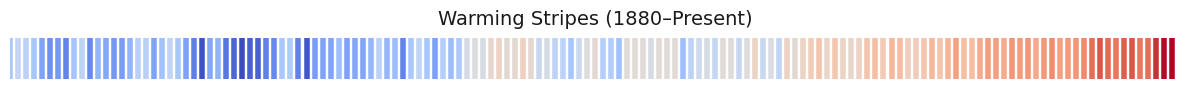

In [22]:
df['Year'] = df['Date'].dt.year
annual_avg = df.groupby('Year')['Temperature Anomaly'].mean().reset_index()

# Normalize anomalies for colormap
norm = mcolors.TwoSlopeNorm(
    vmin=annual_avg['Temperature Anomaly'].min(),
    vcenter=0,
    vmax=annual_avg['Temperature Anomaly'].max()
)
colors = plt.cm.coolwarm(norm(annual_avg['Temperature Anomaly']))

fig, ax = plt.subplots(figsize=(12, 1))

# Draw each vertical stripe
for idx, year in enumerate(annual_avg['Year']):
    ax.axvline(x=idx, color=colors[idx], linewidth=4)

# Remove axes and ticks
ax.set_xlim(0, len(annual_avg))
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

# Optional: Add a subtle title
plt.title("Warming Stripes (1880–Present)", fontsize=14, color='#1a1a1a', pad=10)

# Save output
output_dir = "outputs/visualizations"
os.makedirs(output_dir, exist_ok=True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "warming_stripes_light.png"), dpi=200, bbox_inches='tight')
plt.show()